In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])

#1. Data Collection and Pre-processing
# Load data (replace with your actual file names)
df = pd.read_csv('All_dataset_Avg_Stage.csv')

# Creating a DataFrame from the numpy array #splitting the dataset
X = df.drop(columns=['SPAD'])  # Drop 'sample_id' and 'SPAD' to get the features
y = df['SPAD']  # Target variable

print(df)
print (X)
print(y )

# Check for missing values
print(df.isnull().sum())


           500        501        502        503       504        505  \
0     7.488333   7.253333   7.077500   8.065278  6.978148   7.313889   
1     7.235278   7.122222   7.055000   8.007222  6.864074   7.192222   
2     7.245833   7.220556   7.080556   7.990000  6.881111   7.228056   
3     9.228333   9.788056   9.297222   9.926389  8.722593   9.748333   
4    10.380833  10.829722  10.318611  11.016389  9.845185  10.920833   
..         ...        ...        ...        ...       ...        ...   
391   2.277222   2.307500   2.363333   2.468333  2.492222   2.548056   
392   3.072222   3.276111   3.247778   3.269444  3.244074   3.493333   
393   3.756667   3.955278   3.939444   4.031944  4.032222   4.301944   
394   3.405833   3.581389   3.533889   3.588333  3.583333   3.856667   
395   3.336389   3.541944   3.519722   3.568889  3.575556   3.824444   

           506        507        508       509  ...        943        944  \
0     8.560556   8.508056   7.975000  7.464722  ...  77.03

In [2]:
#Explore data statistics
df.describe()

,500,501,502,503,504,505,506,507,508,509,...,943,944,945,946,947,948,949,950,SPAD,stage
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000
mean,5.398881,5.244142,5.326621,5.557840,5.542684,5.678860,5.953840,6.095931,6.196215,6.333489,...,35.506581,35.325832,35.201064,35.408970,35.474734,35.755740,35.719565,35.470100,34.506995,2.500000
std,2.313364,2.013350,1.979704,2.085122,2.026072,2.142889,2.346925,2.327990,2.299672,2.329946,...,14.070261,14.018234,13.975847,13.998655,14.080365,14.063655,14.028885,14.099824,5.027776,1.119448
min,1.955833,2.030000,2.055833,2.103333,1.993333,2.016250,2.140000,2.255000,2.363750,2.454167,...,14.862500,14.499167,14.698667,15.411667,15.236667,15.407500,15.570833,15.226667,17.200000,1.000000
25%,4.015625,4.046042,4.146250,4.287500,4.318889,4.401042,4.544236,4.650417,4.766667,4.897986,...,27.199167,27.316875,27.400500,27.453750,27.509236,27.717917,27.607431,27.393333,31.692500,1.750000
50%,4.780833,4.790000,4.932778,5.061389,5.134444,5.309722,5.414444,5.561944,5.703056,5.815417,...,32.620417,32.476042,32.359333,32.575000,32.608889,32.765417,32.659583,32.637083,35.100000,2.500000
75%,6.295208,5.921667,6.041250,6.322292,6.418889,6.548542,6.773750,7.061250,7.225625,7.337500,...,38.932639,38.788333,38.421833,38.700833,39.045833,39.062778,39.119514,38.980000,38.230000,3.250000
max,14.027222,14.777778,14.195278,15.045833,14.172222,15.616667,17.639167,16.437778,15.145833,14.742500,...,105.858333,106.064167,106.269556,106.318889,106.125000,106.340556,106.453889,106.322222,47.700000,4.000000


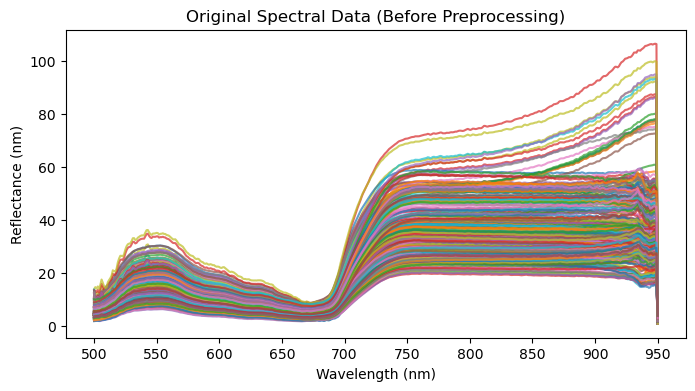

In [3]:
# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_wavelengths = X.shape[1]  # Assuming the number of columns in X corresponds to the number of wavelengths

# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(X.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('Original Spectral Data (Before Preprocessing)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()


In [4]:
# Step 1: Calculate Q1, Q3, and IQR for the spectral data
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Identify outliers in the spectral data
outliers = (X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))

# Step 3: Create a mask to identify rows with any outliers
outlier_mask = outliers.any(axis=1)

# Step 4: Calculate the absolute deviation from the IQR boundaries for ranking
deviation = np.maximum((Q1 - X).abs(), (X - Q3).abs())

# Apply the mask to get deviations only for the identified outliers
deviation = deviation[outlier_mask]

# Step 5: Sum deviations across features for each sample (to rank overall extremeness)
total_deviation = deviation.sum(axis=1)

# Step 6: Calculate the maximum number of outliers to remove (5% of the total data)
num_samples = len(X)
max_outliers_to_remove = int(0.05 * num_samples)

# Get indices of the top 5% most extreme outliers
top_outlier_indices = total_deviation.nlargest(max_outliers_to_remove).index

# Create a new outlier mask based on the top 5% of deviations
final_outlier_mask = pd.Series(False, index=X.index)
final_outlier_mask.loc[top_outlier_indices] = True

# Step 7: Remove the top 5% most extreme outliers
cleaned_spectral_data = X[~final_outlier_mask]
cleaned_spad_data = y[~final_outlier_mask]

# Step 8: Combine the cleaned spectral data and SPAD values back into a single DataFrame (if needed)
cleaned_df = pd.concat([cleaned_spectral_data, cleaned_spad_data], axis=1)

# Step 9: Display the results
print(f"Original dataset size: {X.shape[0]}")
print(f"Number of outliers removed: {final_outlier_mask.sum()}")
print(f"Cleaned dataset size: {cleaned_df.shape[0]}")
print(f"Cleaned spectral data size: {cleaned_spectral_data.shape[0]}")

Original dataset size: 396
Number of outliers removed: 19
Cleaned dataset size: 377
Cleaned spectral data size: 377


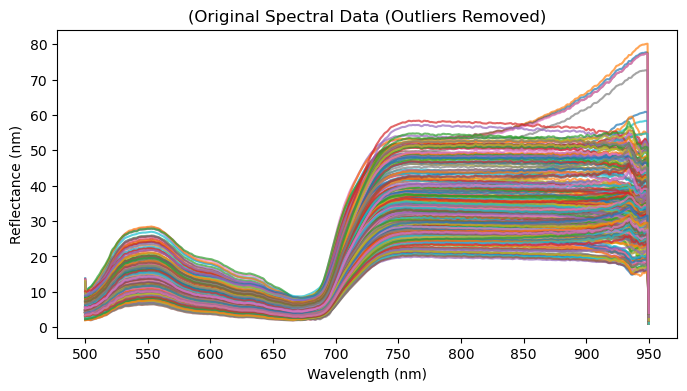

In [5]:
# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_columns = cleaned_spectral_data.shape[1]


# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(cleaned_spectral_data.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('(Original Spectral Data (Outliers Removed)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()

In [6]:
# Step 2: Calculate the correlation matrix for the combined DataFrame
correlation_matrix = cleaned_df.corr()

# Step 3: Extract correlations with the SPAD column (assuming the SPAD column is named 'SPAD')
correlations_with_spad = correlation_matrix['SPAD'].drop('SPAD')

# Step 4: Display the correlation values
print("Correlation values with SPAD:")
print(correlations_with_spad)

# Step 5: Sort correlations by absolute value to find strongest relationships
sorted_correlations = correlations_with_spad.abs().sort_values(ascending=False)
print("Top features correlated with SPAD:")
print(sorted_correlations.head(10))

# Step 6: Set a correlation threshold for feature selection
threshold = 0.3
mask = correlations_with_spad.abs() > threshold

# Step 7: Select features with a correlation higher than the threshold
selected_features = correlations_with_spad[mask].index
X_selected = cleaned_spectral_data[selected_features]


Correlation values with SPAD:
500     -0.193290
501     -0.382635
502     -0.396040
503     -0.419850
504     -0.413272
           ...   
947     -0.227754
948     -0.231716
949     -0.229338
950     -0.230477
stage    0.227879
Name: SPAD, Length: 452, dtype: float64
Top features correlated with SPAD:
698    0.584698
699    0.583911
697    0.583470
696    0.581167
700    0.581010
695    0.577579
701    0.576759
702    0.574070
694    0.573485
703    0.571587
Name: SPAD, dtype: float64


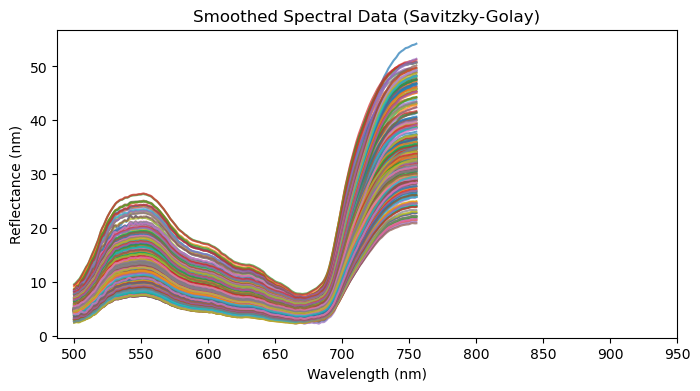

In [7]:
# Function to apply Savitzky-Golay smoothing
def savitzky_golay(X_selected, window_size=11, poly_order=2):
    return savgol_filter(X_selected , window_size, poly_order, axis=0)

# Apply Savitzky-Golay smoothing to X_selected
spectral_sgm = savitzky_golay(X_selected, window_size=11, poly_order=2)

# Create the wavelength range from 500nm to 950nm
wavelengths = np.arange(500, 951, 50)  # Wavelengths from 500nm to 950nm with 100nm intervals
num_columns = spectral_sgm.shape[1]


# Plot the spectral data
plt.figure(figsize=(8, 4))
plt.plot(spectral_sgm.T, alpha=0.7)

# Set x-axis labels to the wavelength values (500nm, 600nm, ..., 950nm)
plt.xticks(ticks=np.linspace(0, num_wavelengths-1, len(wavelengths)), labels=wavelengths)

# Add titles and labels
plt.title('Smoothed Spectral Data (Savitzky-Golay)')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Reflectance (nm)')

# Display the plot
plt.show()

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA

# Ensure X (features) and y (target) are passed
# Spectral_sgm contains spectral data (features)
# and cleaned_spad_data contains SPAD values (target)
#NOte
#X = spectral_sgm  # Independent variables (features)
#y = cleaned_spad_data  # Dependent variable (target)

# Splitting data into training (80%) and testing (20%) sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=175)
X_train, X_test, y_train, y_test = train_test_split(spectral_sgm, cleaned_spad_data, test_size=0.20, random_state=175)

# Now apply StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

# Apply ICA
ica = FastICA(n_components=12, max_iter=500, tol=0.01, random_state=175)
X_train_ica = ica.fit_transform(X_train_scaled)
X_test_ica = ica.transform(X_test_scaled)

# Print shape of transformed data
print(f"ICA-transformed training data shape: {X_train_ica.shape}")
print(f"ICA-transformed testing data shape: {X_test_ica.shape}")



ICA-transformed training data shape: (301, 12)
ICA-transformed testing data shape: (76, 12)


In [9]:

from scipy.stats import pearsonr
import numpy as np

# Pearson Correlation for Feature Selection
def select_features_pearson(X_train_ica, y_train, threshold=0.1):
    # Calculate Pearson correlation for each feature in X_train with y_train
    correlations = np.array([pearsonr(X_train_ica[:, i], y_train)[0] for i in range(X_train_ica.shape[1])])
    
    # Select indices of features with absolute correlation greater than threshold
    selected_features = np.where(np.abs(correlations) > threshold)[0]
    
    # Return the filtered training set and the indices of selected features
    return X_train_ica[:, selected_features], selected_features

# Apply Pearson Correlation for Feature Selection
threshold = 0.2  # Adjust the threshold as needed
X_train_pearson, selected_features = select_features_pearson(X_train_ica, y_train, threshold)

# Apply the same feature selection to X_test
X_test_pearson = X_test_ica[:, selected_features]

# Output
print(f"Number of features selected by Pearson correlation: {len(selected_features)}")
print("Selected features indices (Pearson):", selected_features)

Number of features selected by Pearson correlation: 5
Selected features indices (Pearson): [ 1  5  8  9 10]


In [10]:
# Define parameter grids for RandomizedSearchCV
alpha = np.logspace(-6, 50, 2)  # Range from 0.001 to 100
l1_ratio = np.linspace(0.1, 1, 80)  # More granular search for l1 ratio

param_dist_elnet = {
    'alpha': alpha,
    'l1_ratio': l1_ratio
}
# Initialize models
model_elnet = ElasticNet(random_state=175) 
# Perform RandomizedSearchCV for each model
random_search_elnet = RandomizedSearchCV(model_elnet, param_distributions=param_dist_elnet, n_iter=25, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=175, error_score='raise')
random_search_elnet.fit(X_train_pearson, y_train)
best_elnet = random_search_elnet.best_estimator_
best_params_elnet = random_search_elnet.best_params_
print("Best parameters for Elastic Net: ", best_params_elnet)
# Cross-validation with the best hyperparameters for each model
mse_scores_elnet = cross_val_score(best_elnet, X_train_pearson, y_train, scoring='neg_mean_squared_error', cv=5)

# Convert negative MSE to positive MSE and calculate the average MSE
mse_scores_elnet = -mse_scores_elnet
average_mse_elnet = np.mean(mse_scores_elnet)
# Print cross-validation results
print(f"Average MSE for Elastic Net: {average_mse_elnet}")
# Evaluate the individual models
models = {
    "ElasticNet": best_elnet
}
# Function to calculate evaluation metrics including Pearson correlation
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rpd = np.std(y_true) / rmse
    pearson_corr, _ = pearsonr(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2, "RPD": rpd, "Pearson": pearson_corr}

# Evaluate individual models
metrics_train = {}
metrics_test = {}

for name, model in models.items():
    print(f"Evaluating {name} model...")
    model.fit(X_train_pearson, y_train)
    
    y_train_pred = model.predict(X_train_pearson)
    y_test_pred = model.predict(X_test_pearson)
    
    if y_train_pred.ndim > 1:  # Ensure predictions have the correct shape
        y_train_pred = y_train_pred.ravel()
    if y_test_pred.ndim > 1:
        y_test_pred = y_test_pred.ravel()
    
    metrics_train[name] = calculate_metrics(y_train, y_train_pred)
    metrics_test[name] = calculate_metrics(y_test, y_test_pred)

print("Training Metrics:")
print(pd.DataFrame(metrics_train).T)
print("\nTesting Metrics:")
print(pd.DataFrame(metrics_test).T)

Best parameters for Elastic Net:  {'l1_ratio': 0.2139240506329114, 'alpha': 1e-06}
Average MSE for Elastic Net: 9.793011151614262
Evaluating ElasticNet model...
Training Metrics:
                 MAE       MSE  Pearson        R2      RMSE       RPD
ElasticNet  2.320967  9.411959  0.77937  0.607417  3.067892  1.596006

Testing Metrics:
                 MAE       MSE   Pearson        R2      RMSE       RPD
ElasticNet  2.454828  9.913478  0.797914  0.612885  3.148568  1.607238


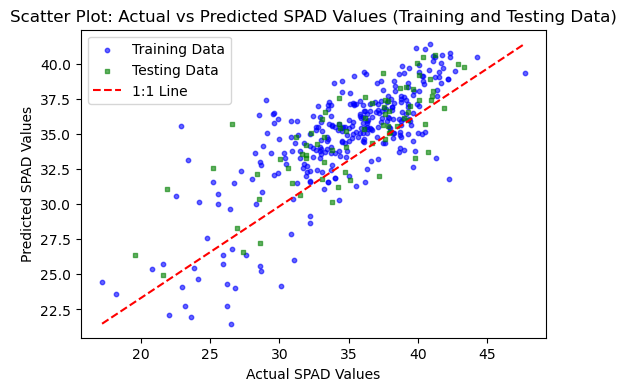

In [11]:
import matplotlib.pyplot as plt

# Assuming these are your actual and predicted SPAD values for both training and testing sets
y_train_actual = y_train # Replace with your actual training SPAD values
y_train_predicted = y_train_pred # Replace with your predicted SPAD values from the model (training)

y_test_actual = y_test  # Replace with your actual testing SPAD values
y_test_predicted = y_test_pred  # Replace with your predicted SPAD values from the model (testing)

# Combined Plot
plt.figure(figsize=(6, 4))

# Scatter plot for Training Data (circles)
plt.scatter(y_train_actual, y_train_predicted, color='blue', alpha=0.6, s=10, marker='o', label='Training Data')

# Scatter plot for Testing Data (squares)
plt.scatter(y_test_actual, y_test_predicted, color='green', alpha=0.6, s=10, marker='s', label='Testing Data')

# Plot the 1:1 line (perfect prediction)
plt.plot([min(min(y_train_actual), min(y_test_actual)), max(max(y_train_actual), max(y_test_actual))],
         [min(min(y_train_predicted), min(y_test_predicted)), max(max(y_train_predicted), max(y_test_predicted))],
         color='red', linestyle='--', label='1:1 Line')

# Labels and title
plt.xlabel('Actual SPAD Values', fontsize=10)
plt.ylabel('Predicted SPAD Values', fontsize=10)
plt.title('Scatter Plot: Actual vs Predicted SPAD Values (Training and Testing Data)', fontsize=12)

# Add legend
plt.legend()

# Remove grid and display plot
plt.show()

